<a href="https://colab.research.google.com/github/neelgupta28/Movie-review-Sentiment-analysis/blob/main/MRSA_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Movie Review Sentiment Classification using LSTM
# Fully runnable on Google Colab

# 1. Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

# 2. Load IMDB Dataset
vocab_size = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# 3. Pad Sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# 4. Build LSTM Model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# 5. Train Model
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

# 6. Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# 7. Predict on Custom Review
word_index = imdb.get_word_index()

def encode_review(text):
    tokens = text.lower().split()
    encoded = [word_index.get(word, 2) for word in tokens]
    return pad_sequences([encoded], maxlen=max_len)

review = "This movie was absolutely fantastic and inspiring"
pred = model.predict(encode_review(review))
print("Positive" if pred[0][0] > 0.5 else "Negative")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6830 - loss: 0.5667 - val_accuracy: 0.8486 - val_loss: 0.3584
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8837 - loss: 0.2946 - val_accuracy: 0.8194 - val_loss: 0.4016
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9116 - loss: 0.2277 - val_accuracy: 0.8686 - val_loss: 0.3278
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9501 - loss: 0.1415 - val_accuracy: 0.8668 - val_loss: 0.4110
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9647 - loss: 0.1035 - val_accuracy: 0.8494 - val_loss: 0.5169
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8461 - loss: 0.5348
Test Accuracy: 84.90%
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Negative


                                        review  sentiment
0  This movie was amazing and full of emotions          1
1                    Absolutely fantastic film          1
2                 I loved the acting and story          1
3                  Best movie I have ever seen          1
4          Wonderful direction and great music          1
5            The movie was boring and too long          0
6                      Worst movie of the year          0
7              I did not like this film at all          0
8                          Very poor storyline          0
9            Terrible acting and bad direction          0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6528 - loss: 0.6912
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2931 - loss: 0.7137     
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4458 - loss: 0.6983 
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2444 - loss: 0.7001     
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2389 - loss: 0.7033     
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6236 - loss: 0.6911 
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5542 - loss: 0.6858
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4875 - loss: 0.6939 
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7069 - loss: 0.6881 
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5819 - loss: 0.6893 
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6514 - loss: 0.6929 
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6444 - loss

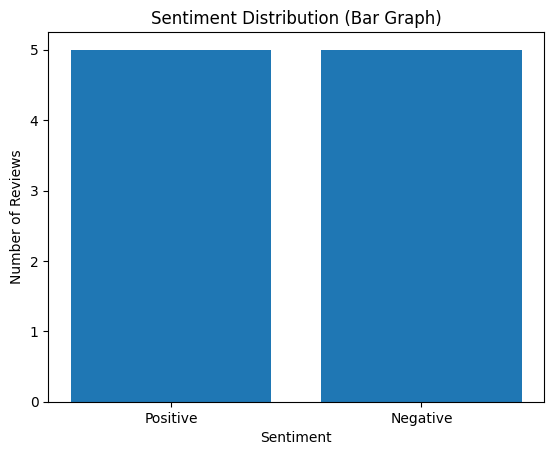

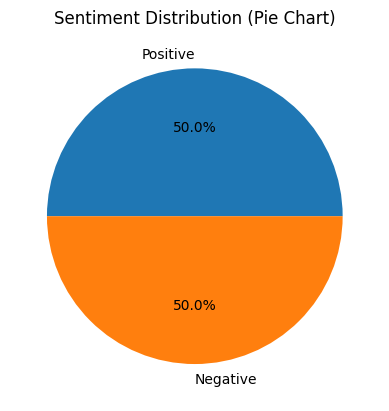

In [ ]:
# Movie Review Sentiment Classification using LSTM
# Manual Dataset – Google Colab Ready

# =========================
# 1. Import Libraries
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# =========================
# 2. Manually Created Dataset
# =========================
data = {
    "review": [
        "This movie was amazing and full of emotions",
        "Absolutely fantastic film",
        "I loved the acting and story",
        "Best movie I have ever seen",
        "Wonderful direction and great music",
        "The movie was boring and too long",
        "Worst movie of the year",
        "I did not like this film at all",
        "Very poor storyline",
        "Terrible acting and bad direction"
    ],
    "sentiment": [1,1,1,1,1,0,0,0,0,0]  # 1 = Positive, 0 = Negative
}

df = pd.DataFrame(data)
print(df)

# =========================
# 3. Text Preprocessing
# =========================
vocab_size = 500
max_len = 20

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df["review"])

sequences = tokenizer.texts_to_sequences(df["review"])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

X = padded_sequences
y = np.array(df["sentiment"])

# =========================
# 4. Build LSTM Model
# =========================
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =========================
# 5. Train Model
# =========================
history = model.fit(
    X, y,
    epochs=30,
    batch_size=2,
    verbose=1
)

# =========================
# 6. Predict Custom Review
# =========================
test_review = ["The movie was fantastic and enjoyable"]
seq = tokenizer.texts_to_sequences(test_review)
pad = pad_sequences(seq, maxlen=max_len, padding='post')

prediction = model.predict(pad)
print("Prediction:", "Positive" if prediction[0][0] > 0.5 else "Negative")

# =========================
# 7. Bar Graph Visualization
# =========================
sentiment_counts = df['sentiment'].value_counts()

plt.figure()
plt.bar(['Positive', 'Negative'], [sentiment_counts[1], sentiment_counts[0]])
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution (Bar Graph)")
plt.show()

# =========================
# 8. Pie Chart Visualization
# =========================
plt.figure()
plt.pie(
    [sentiment_counts[1], sentiment_counts[0]],
    labels=['Positive', 'Negative'],
    autopct='%1.1f%%'
)
plt.title("Sentiment Distribution (Pie Chart)")
plt.show()
